## GPT Training Evaluation

In [1]:
import os
import matplotlib.pyplot as plt

# Use LaTeX style for text rendering
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern']
#plt.rcParams['font.size'] = 16
#plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amsfonts}'

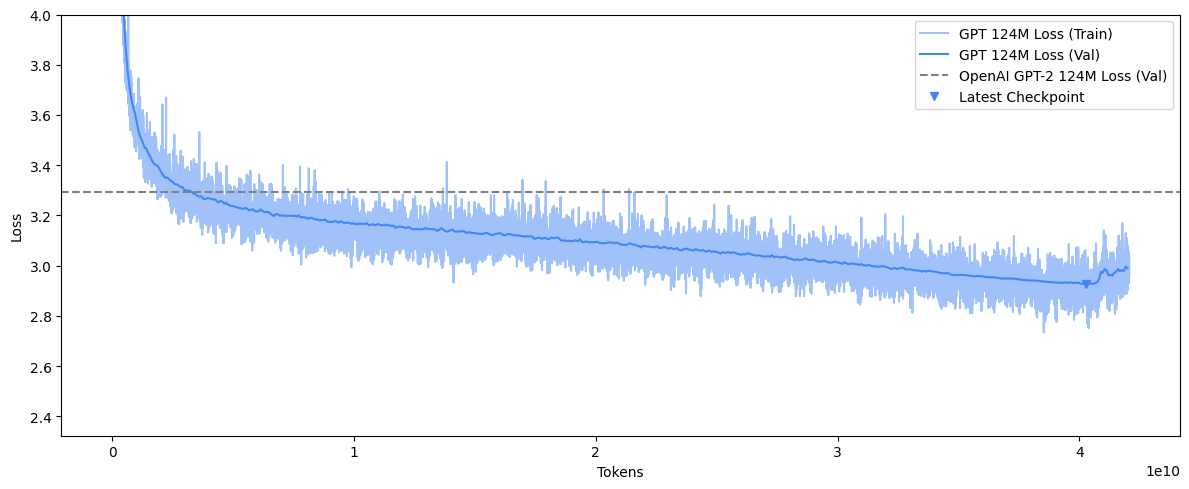

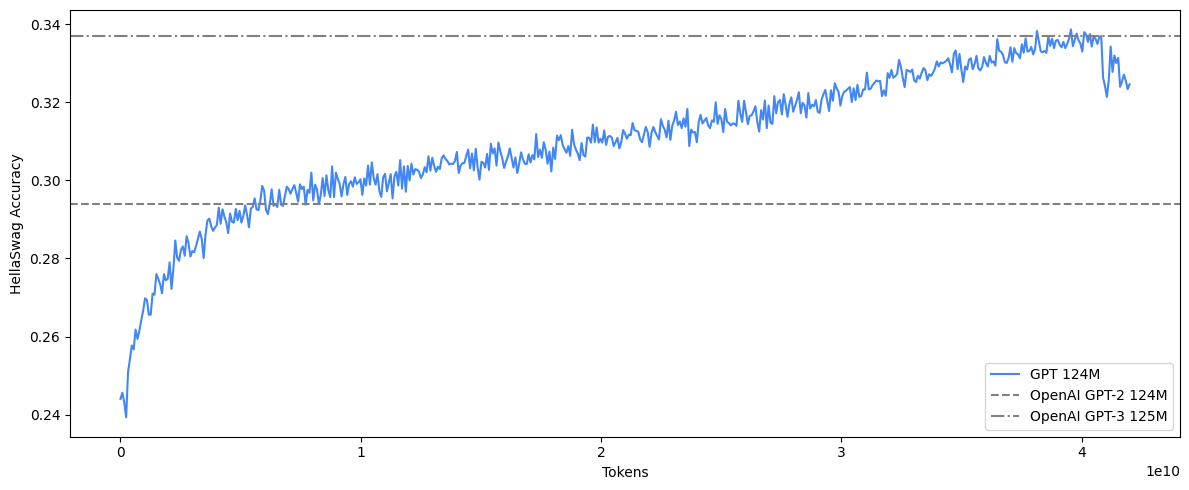

In [2]:
# GPT-2 (124M) Loss after 100B tokens
gpt2_loss = 3.2924

# GPT-2 (124M) and GPT-3 (125M) HellaSwag acc after 100B and 300B tokens respectively
gpt2_hs = 0.294
gpt3_hs = 0.337

log_file = '124M.txt'

# Read the log file, group by stream name ('train', 'val', 'hella', 'ckpt')
streams = {}
with open(os.path.join('cache/', log_file), 'r') as f:
    for line in f:
        step, n_tokens, stream, val = line.strip().split()
        if stream not in streams:
            streams[stream] = ([], [])
        streams[stream][0].append(int(n_tokens[1:-1]))
        streams[stream][1].append(float(val))

# Train and Validation Loss
plt.figure(figsize=(12, 5))
plt.plot(*streams['train'], color='#4287f5', alpha=0.5, label='GPT 124M Loss (Train)')
plt.plot(*streams['val'], color='#4287f5', label='GPT 124M Loss (Val)')
# Plot the GPT-2 loss baseline
plt.axhline(y=gpt2_loss, color='grey', linestyle='--', label='OpenAI GPT-2 124M Loss (Val)')
# Plot latest checkpoint
plt.plot(streams['ckpt'][0][-1:], streams['ckpt'][1][-1:], color='#4287f5', marker='v', linestyle='None', label='Latest Checkpoint')
plt.xlabel('Tokens')
plt.ylabel('Loss')
plt.ylim(top=4.0)
plt.legend()
plt.tight_layout()
plt.savefig(f'cache/{log_file[:-4]}_loss.pdf')
plt.show()

# HellaSwag Evaluation
plt.figure(figsize=(12, 5))
plt.plot(*streams['hella'], color='#4287f5', label='GPT 124M')
# Plot the GPT-2 and GPT-3 HellaSwag checkpoints
plt.axhline(y=gpt2_hs, color='grey', linestyle='--', label='OpenAI GPT-2 124M')
plt.axhline(y=gpt3_hs, color='grey', linestyle='-.', label='OpenAI GPT-3 125M')
plt.xlabel('Tokens')
plt.ylabel('HellaSwag Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig(f'cache/{log_file[:-4]}_hs.pdf')
plt.show()

In [3]:
# Print the minimum validation loss
min_val = min(streams['val'][1])
min_val_idx = streams['val'][1].index(min_val)
min_val_tokens = streams['val'][0][min_val_idx]
print(f'Minimum Validation Loss: {min_val:.3f} @ {min_val_tokens:,} (GPT-2: {gpt2_loss:.3f})')

# Print the maximum HellaSwag accuracy
max_hs = max(streams['hella'][1])
max_hs_idx = streams['hella'][1].index(max_hs)
max_hs_tokens = streams['hella'][0][max_hs_idx]
print(f'Maximum HellaSwag accuracy: {max_hs:.3f} @ {max_hs_tokens:,} (GPT-2: {gpt2_hs:.3f}, GPT-3: {gpt3_hs:.3f})')

Minimum Validation Loss: 2.928 @ 40,265,842,688 (GPT-2: 3.292)
Maximum HellaSwag accuracy: 0.339 @ 39,558,053,888 (GPT-2: 0.294, GPT-3: 0.337)
